# Basic image manipulation

In this notebook we will showcase how we can use the array indexing and array math to perform basic image manipulation using OpenCV.

We can start by importing required packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

In [2]:
# make the plots bigger
plt.rcParams["figure.figsize"] = (10,10)

We can then define some functions we will use very often.

In [3]:
def open_image(imgpath, mode=cv2.IMREAD_GRAYSCALE):
    """
    Open an image as an numpy array.
    
    Parameters
    ----------
    imgpath : `str`
        Path to the image.
    mode : `int`, optional
        Mode with which to open the image, i.e. color vs black and white.
        Must be one of the OpenCV recognized constants such as 
        `cv2.IMREAD_GRAYSCALE` or `cv2.IMREAD_COLOR`
        
    Returns
    --------
    img : `np.array`
        Image.
        
    Raises
    ------
    OSError - when the file could not be opened.
    """
    img = cv2.imread(imgpath, mode)
    if img is None:
        raise OSError("Can't open file:", imgpath)
    else:
        return img

def show(img, ax=None, **kwargs):
    """
    Show image using matplotlib.
    
    Parameters
    ----------
    img : `np.array`
        Image to display.
    ax : `matplotlib.pyplot.Axes` or `None`, optional
        Ax on which to plot the image. If  no axis is given
        a new figure is created.
    kwargs : `dict`, optional
        Keyword arguments that are passed to `imshow`.
    """
    if ax is None:
        fig, ax = plt.subplots()
        
    ax.imshow(img, **kwargs)

# How do real images look like

Let's take a peek. We can inspect the array dimensions, data type and data value ranges.

For examples we can use the images in the `images` directory.

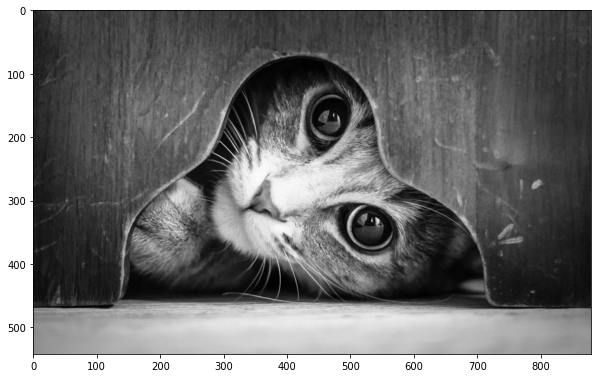

In [4]:
imgbw = open_image("images/cat.png")
show(imgbw, cmap="gray")

In [5]:
print("shape     ", imgbw.shape)
print("data type ", imgbw.dtype)
print("max       ", imgbw.max())
print("min       ", imgbw.min())
print("mean      ", imgbw.mean())
print("Image element: ", imgbw[0, 0])

shape      (542, 880)
data type  uint8
max        164
min        0
mean       60.64185885608856
Image element:  22


Let's do the same, but let's just see what happens if we use a different image mode. 

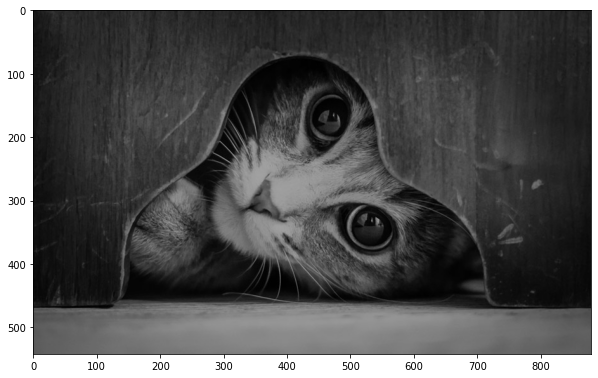

In [6]:
imgc = open_image("images/cat.png", cv2.IMREAD_UNCHANGED)
show(imgc)

In [7]:
print("shape     ", imgc.shape)
print("data type ", imgc.dtype)
print("max       ", imgc.max())
print("min       ", imgc.min())
print("mean      ", imgc.mean())
print("Image element: ", imgc[0, 0])

shape      (542, 880, 3)
data type  uint8
max        164
min        0
mean       60.64185885608856
Image element:  [22 22 22]


Do you notice any differences between the two examples?          
Is the image still black and white?   
Can you spot differences between the way the two images look like?        
Are our array elements the same?           
Our dtypes?          

Can we trust what our eyes see?

## Doing image math

Even basic operations on images, such as subtracting, can be complicated. At the same time they can be quite powerfull. 

Let's start by applying the basic array math we just used in 1_numpy_arrays.       
Adding a value to the whole array increases brightness of the image. Subtracting value does the oposite.

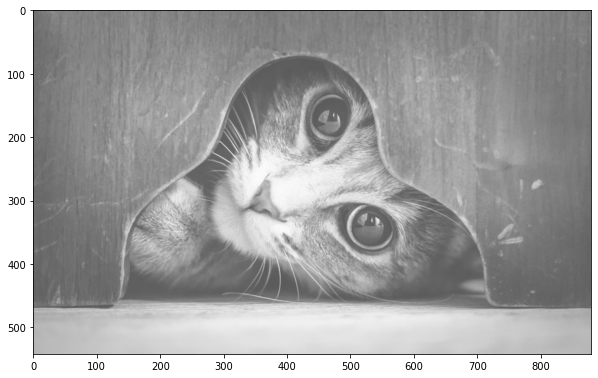

In [8]:
show(imgc+90, cmap="gray")

Slicing operators return image regions.

In [9]:
dimx, dimy = imgbw.shape
centerx, centery = int(dimx/2), int(dimy/2)

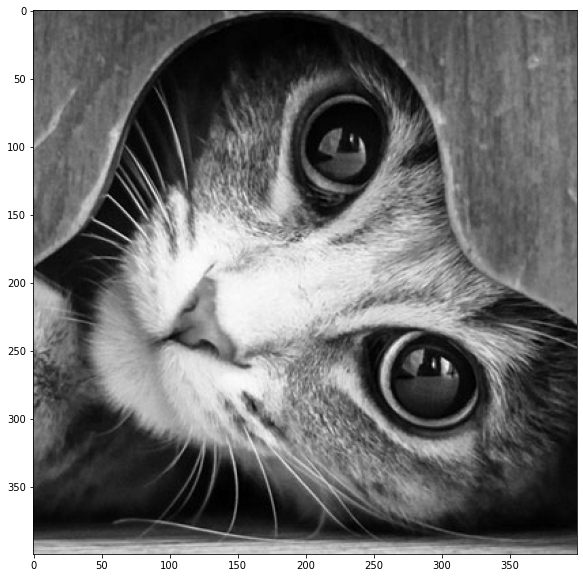

In [10]:
# square selection
box_size = 200
cutout = imgbw[
    centerx-box_size:centerx+box_size, 
    centery-box_size:centery+box_size
]
show(cutout, cmap="gray")

How would you use numpy indexing to select a circle?

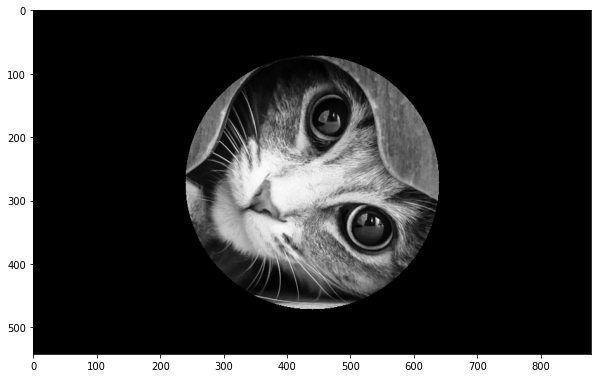

In [11]:
x, y = np.ogrid[:dimx, :dimy]
mask = ( (x-centerx)**2 + (y-centery)**2 ) > 200**2
cutout = imgbw.copy()
cutout[mask] = 0
show(cutout, cmap="gray")

OpenCv helps us a lot here by having a bunch of these methods already availible which saves us a headache.

**Note** - the way NumPy an OpenCV index arrays is not exactly the same. Above we could confidently state:
```
x, y = np.ogrid[:dimx, :dimy]
```
but with OpenCV the origin is not bottom left, it is the top left instead. 
```
cv2.circle(mask, (centery, centerx), 200, (255, 255, 255), -1)
```
Using top left as origin is a well established convention in Computer Vision, so in this case it's `matplotlib` that's "odd". Naturally Matplotlib uses bottom left, because it's meant to be used as a plotting tool - not an image viewer.

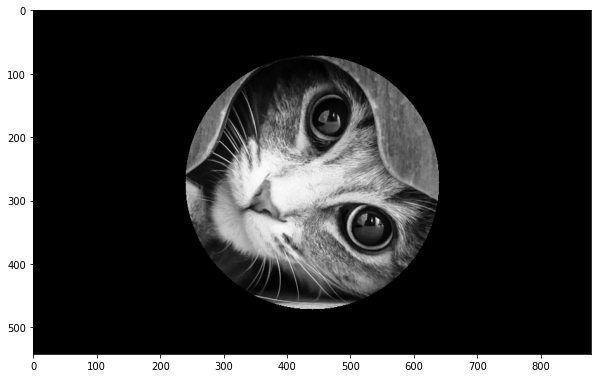

In [12]:
mask = np.zeros(imgbw.shape, dtype=np.uint8)
cv2.circle(mask, (centery, centerx), 200, 255, -1)
cutout = cv2.bitwise_and(imgbw, mask) #or img = img & mask
show(cutout, cmap="gray")

Can you figure out what all the elements in the function mean?

How about in the elipse example?

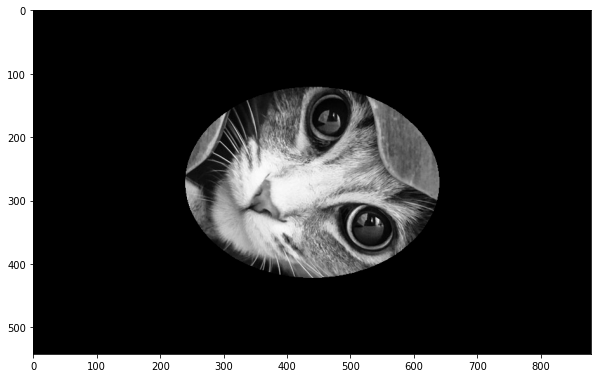

In [13]:
mask = np.zeros(imgbw.shape, dtype=np.uint8)
sma, smi = 200, 150
rot_angle = 0
froma, toa = 0, 360
cv2.ellipse(mask, (centery, centerx), (sma, smi), rot_angle, froma, toa, (255, 255, 255), -1)
cutout = cv2.bitwise_and(imgbw, mask) #or img = img & mask
show(cutout, cmap="gray")

Note that we have a lot of power when drawing with `cv2`. We don't even have to worry about image boundaries.

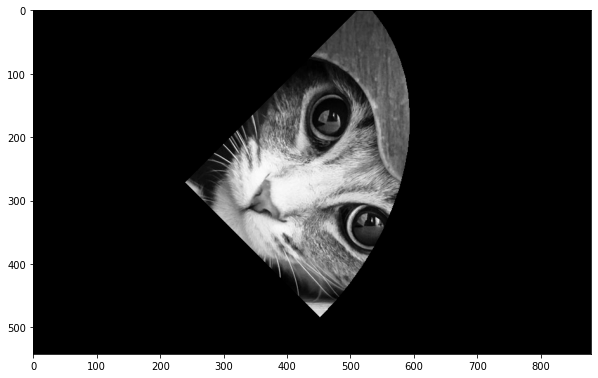

In [14]:
mask = np.zeros(imgbw.shape, dtype=np.uint8)
sma, smi = 300, 400
rot_angle = 45
froma, toa = 270, 360
cv2.ellipse(mask, (centery-200, centerx), (sma, smi), rot_angle, froma, toa, (255, 255, 255), -1)
cutout = cv2.bitwise_and(imgbw, mask) #or img = img & mask
show(cutout, cmap="gray")

## Doing some **usefull** math to our images.

Lets look at one example where we can "improve" our original image by applying just basic operations on it.

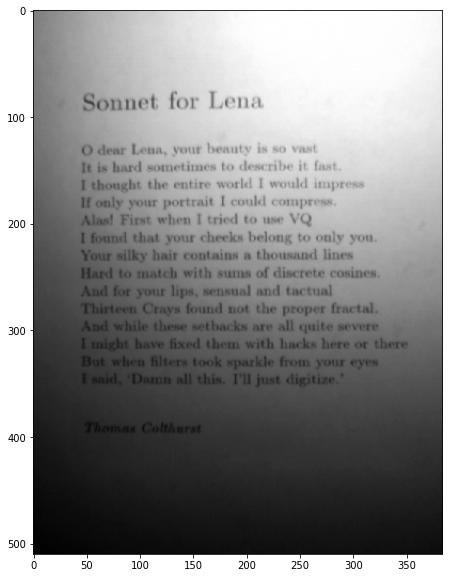

In [15]:
img = open_image("images/son1.png")
show(img, cmap="gray")

Obviously, the image itself is not unreadable. However the picture of the sonnet is not the best.         
There are obvious issues with the light gradient across the image that impedes our ability to read the text itself.

I have taken a liberty of creating a synthetic background for this image that we can use to improve the readability of the text.

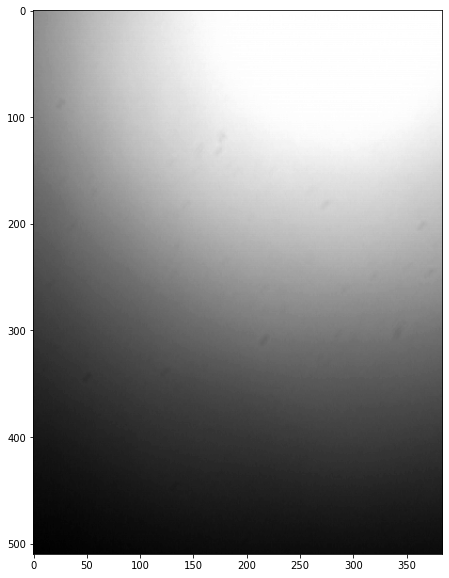

In [16]:
img2 = open_image("images/son2.png")
show(img2, cmap="gray")

How would you use the second image to improve on the first?

Ok, let's try subtraction.

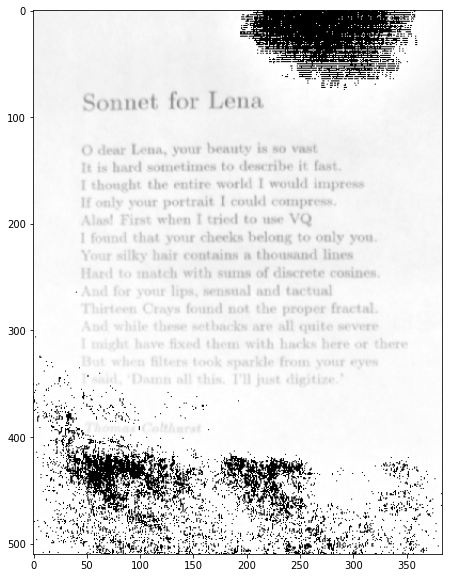

In [17]:
diff = img - img2
show(diff, cmap="gray")

Looks a little bit more uniform but what's with the sudden blotches?

Annoyingly, the math on images doesn't always work as you would expect.          
Let's take an example of two numpy arrays with a single element of type `uint8`:

In [18]:
a = np.array([1], dtype=np.uint8)
b = np.array([2], dtype=np.uint8)

What do you think the following line will print?

In [19]:
a - b

array([255], dtype=uint8)

Can you figure out why?

What would you do to the first, or second image to improve on this?

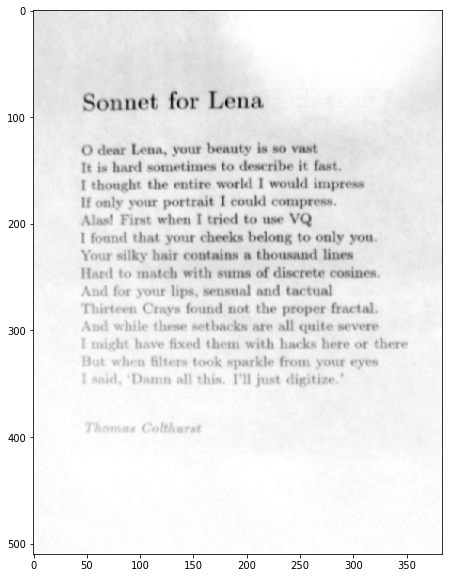

In [20]:
diff[diff < 5] = 255
show(diff, cmap="gray")

Is this the best we can do with subtraction? 

Is this the best we can do in general?      
Think about it, what is it we want? We want to "put in more white" where it's black and no white where it's already white. We know one of the papers is clean and white but it turns out gray when we take a picture of it. What if we could say this gray value is our new white value? How would we say that?

What about division?

On face value, dividing the images shouldn't suffer from the same overflow - so we won't need to manually add in data to fix it.

Lets think about couple of extreme cases here. What happens if we divide two very bright areas? What happens with very dark areas?

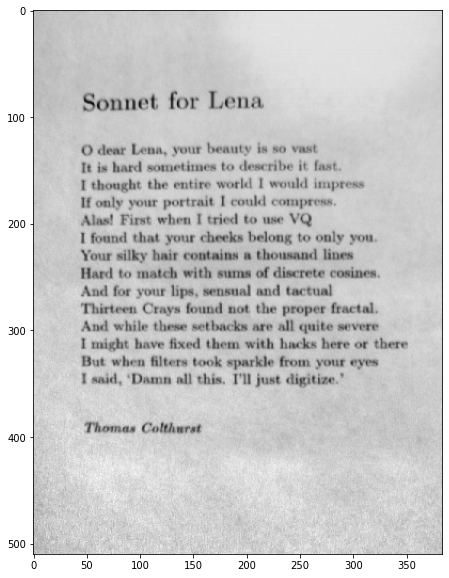

In [21]:
div = img/img2
show(div, cmap="gray")

Let's check out some values on this image though.

In [22]:
print("max", div.max())
print("min", div.min())
print("avg", div.mean())

max 1.0754716981132075
min 0.4207650273224044
avg 0.9249772161050049


So how come this image displays correctly?

Once again, `cv2` has a lot of functionality to help us renormalize our images, however, they might not always behave in the most intuitive ways becuse of the `uint8` overflow.

In [23]:
cv2.convertScaleAbs?

Docstring:
convertScaleAbs(src[, dst[, alpha[, beta]]]) -> dst
.   @brief Scales, calculates absolute values, and converts the result to 8-bit.
.   
.   On each element of the input array, the function convertScaleAbs
.   performs three operations sequentially: scaling, taking an absolute
.   value, conversion to an unsigned 8-bit type:
.   \f[\texttt{dst} (I)= \texttt{saturate\_cast<uchar>} (| \texttt{src} (I)* \texttt{alpha} +  \texttt{beta} |)\f]
.   In case of multi-channel arrays, the function processes each channel
.   independently. When the output is not 8-bit, the operation can be
.   emulated by calling the Mat::convertTo method (or by using matrix
.   expressions) and then by calculating an absolute value of the result.
.   For example:
.   @code{.cpp}
.       Mat_<float> A(30,30);
.       randu(A, Scalar(-100), Scalar(100));
.       Mat_<float> B = A*5 + 3;
.       B = abs(B);
.       // Mat_<float> B = abs(A*5+3) will also do the job,
.       // but it will allocate a temp

# Summary

* Matplotlib is a plotting utility that we can use to visually inspect our images
* OpenCV is a library that contains many many helpfull functions to manipulate and visualize images
* Images are represented as arrays of different dimensions       
   * Color images have 3 or 4 numbers for each of the pixel
   * Black and white images just 1
* The image pixel brightness values are limited by the largest number that can be expressed by the used type           
   * For images that we visualize on screen - that's unsigned 8-bit integers that can take values in the [0, 255] domain
   * But this is not always the case, scientific data is often not restricted to such a low range because of precision.
   * So we can't always trust what we display on the screen, because in order to display it, we have to somehow "bin" the data into those 255 boxes.
* Basic math operations modify some colloquially understood image properties
   * addition increases brightness
   * subtraction decreases it
   * we can remove trends and smooth over details in an image by selecting parts of image          
     or by providing per-pixel values which we can add/subtract or divide out
   * We can express these trends in images as functions over pixels

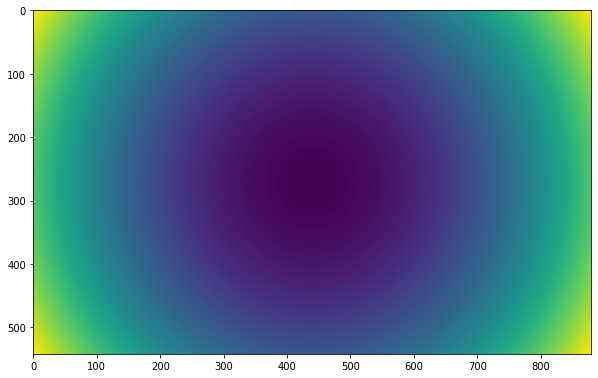

In [47]:
# as an example of how to create a simple gradient
x, y = np.ogrid[:dimx, :dimy]
mask = ( (x-centerx)**2 + (y-centery)**2 )
show(mask)